夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [2]:
!mecab neko.txt -o neko.txt.mecab

## 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．



In [3]:
with open("neko.txt.mecab") as f:
    lis_tem=[]
    res=[]
    for line in f.readlines():
        if 'EOS' not in line:
            tem=line.split('\t')
            right=tem[1].split(',')
            lis_tem.append({'surface':tem[0],'base':right[6],'pos':right[0],'pos1':right[1]})
            if right[1]=='句点':
                res.append(lis_tem)
                lis_tem=[]
res[:3]

[[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
  {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
  {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
  {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
  {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}],
 [{'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
  {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}],
 [{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
  {'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞', 'surface': 'どこ'},
  {'base': 'で', 'pos': '助詞', 'pos1': '格助詞', 'surface': 'で'}

## 31. 動詞

動詞の表層形をすべて抽出せよ．

In [158]:
surface=[]
for x in res:
    for y in x:
        if y["pos"]=="動詞":surface.append(y["surface"])
surface[:10]

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']

## 32. 動詞の原形

動詞の原形をすべて抽出せよ

In [159]:
base=[]
for x in res:
    for y in x:
        if y["pos"]=="動詞":base.append(y["base"])
base[:10]

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']

## 33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ

In [160]:
no_noun=[]
for x in res:
    for i in range(len(x)-1):
        if x[i]["surface"]=="の" and x[i-1]['pos']=='名詞' and x[i+1]['pos']=='名詞':
            no_noun.append(x[i-1]['surface']+"の"+x[i+1]['surface'])
no_noun[:10]

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親']

## 34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [161]:
long_noun=[]
for x in res:
    tem=[]
    for y in x:
        if y["pos"]=="名詞":tem.append(y["surface"])
        else:
            if len(tem)>1:
                long_noun.append("".join(tem))
            tem=[]
long_noun[:10]

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫', '一度', 'ぷうぷうと煙', '邸内', '三毛', '書生以外']

## 35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [21]:
import collections
tem=[]
for x in res:
    for y in x:
        tem.append(y["surface"])
top=collections.Counter(tem).most_common(10)
top

[('の', 9194),
 ('。', 7486),
 ('て', 6868),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('と', 5508),
 ('が', 5337),
 ('た', 3988)]

## 36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

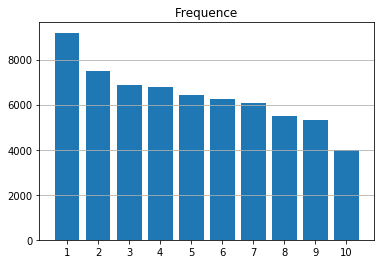

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(10),[x[1] for x in top],tick_label=[i for i in range(1,11)],align="center")
plt.title("Frequence")
plt.grid(axis="y")
plt.show()

In [63]:
a=dict(zip([x[0] for x in top],list(range(1,11))))
list(a.items())

[('の', 1),
 ('。', 2),
 ('て', 3),
 ('、', 4),
 ('は', 5),
 ('に', 6),
 ('を', 7),
 ('と', 8),
 ('が', 9),
 ('た', 10)]

## 37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

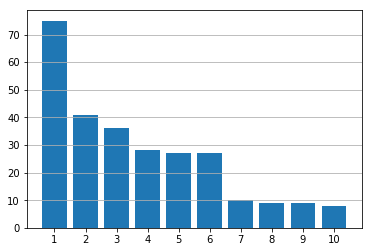

In [15]:
ans=[]
for x in res:
    for index,value in enumerate(x):
        if value["base"]=="猫":
            if x[index-1]["pos"]!="記号": ans.append(x[index-1]["base"])
            if x[index+1]["pos"]!="記号": ans.append(x[index+1]["base"])
neko_top=collections.Counter(ans).most_common(10)
plt.bar(range(10),[x[1] for x in neko_top],tick_label=[i for i in range(1,11)],align="center")
plt.grid(axis="y")
plt.show()

In [14]:
a=dict(zip([x[0] for x in neko_top],list(range(1,11))))
list(a.items())

[('の', 1),
 ('だ', 2),
 ('は', 3),
 ('に', 4),
 ('が', 5),
 ('と', 6),
 ('を', 7),
 ('も', 8),
 ('で', 9),
 ('より', 10)]

## 38. ヒストグラム

単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

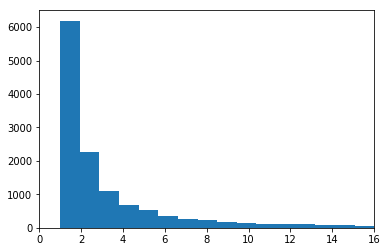

In [24]:
hist=[x[1] for x in collections.Counter(tem).most_common()]

plt.hist(hist,bins=16,range=(1,16))
plt.xlim(0,16)
plt.show()

## 39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

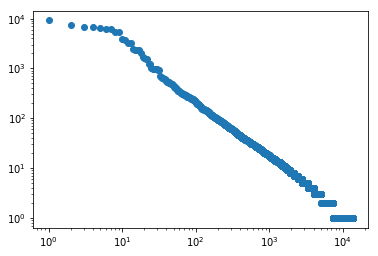

In [23]:
al=list(zip(*collections.Counter(tem).most_common()))
plt.scatter(range(1,len(al[1])+1),al[1])
plt.xscale('log')
plt.yscale('log')
plt.show()